In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("C:\\Users\\ADMIN\\Downloads\\Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Univariate Analysis

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


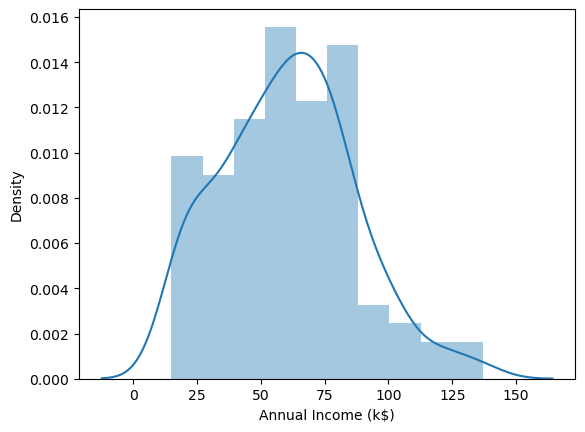

In [9]:
sns.distplot(df['Annual Income (k$)']);

In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

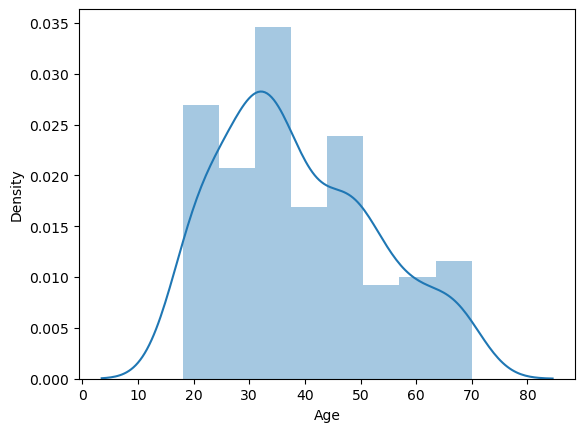

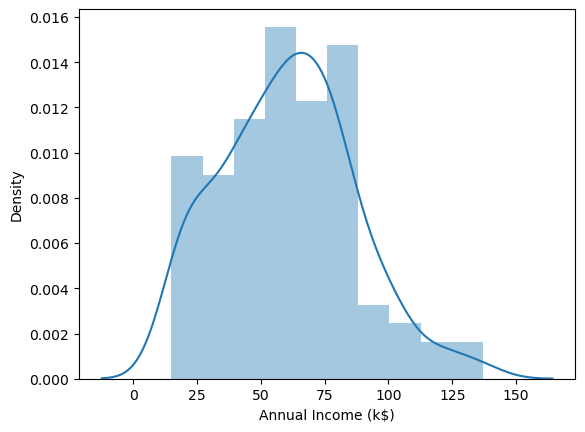

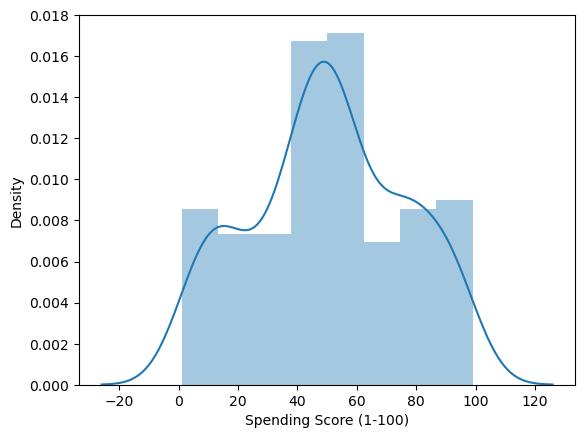

In [136]:
columns =['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

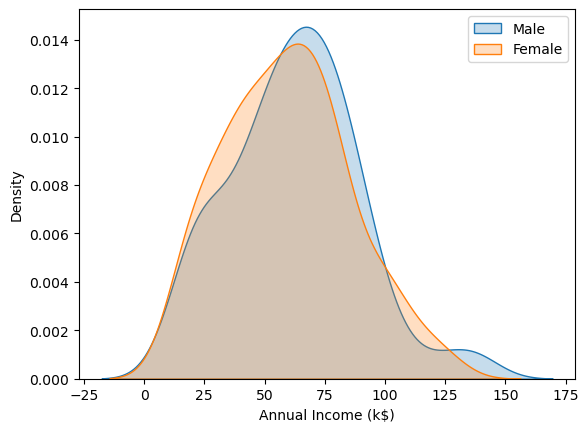

In [25]:
# Filter data by gender
male_data = df[df['Gender'] == 'Male']['Annual Income (k$)']
female_data = df[df['Gender'] == 'Female']['Annual Income (k$)']

# Plot KDEs for each gender
sns.kdeplot(male_data, shade=True, label='Male');
sns.kdeplot(female_data, shade=True, label='Female');
plt.legend();

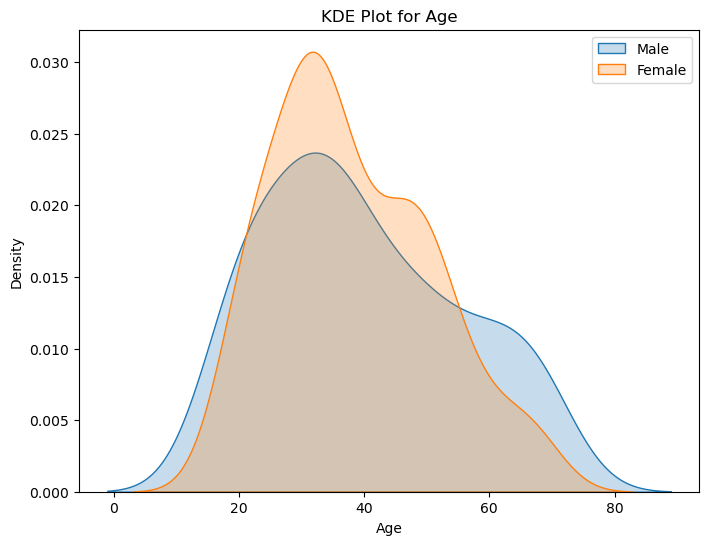

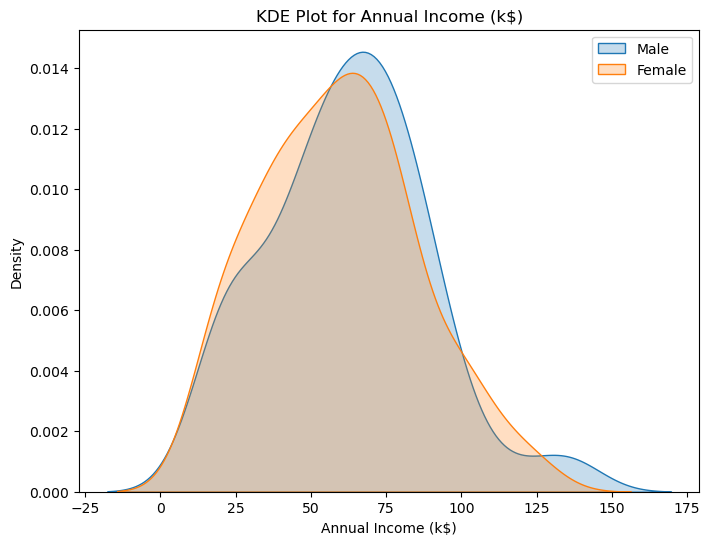

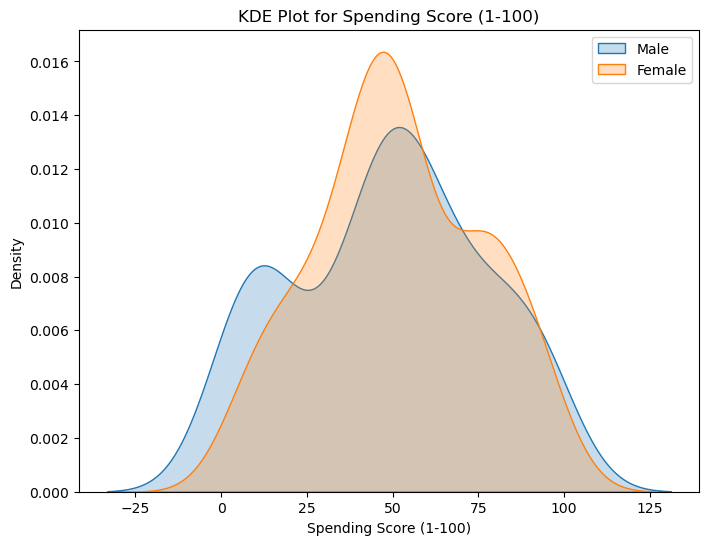

In [28]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Iterate over the columns
for column in columns:
    # Create a new figure
    plt.figure(figsize=(8, 6))
    
    # Iterate over unique values in the 'Gender' column
    for gender in df['Gender'].unique():
        # Filter data by gender
        gender_data = df[df['Gender'] == gender][column]
        
        # Plot KDE for the current gender
        sns.kdeplot(gender_data, shade=True, label=gender)
    
    # Add title and legend
    plt.title(f'KDE Plot for {column}')
    plt.legend()
    
    # Show plot
    plt.show()


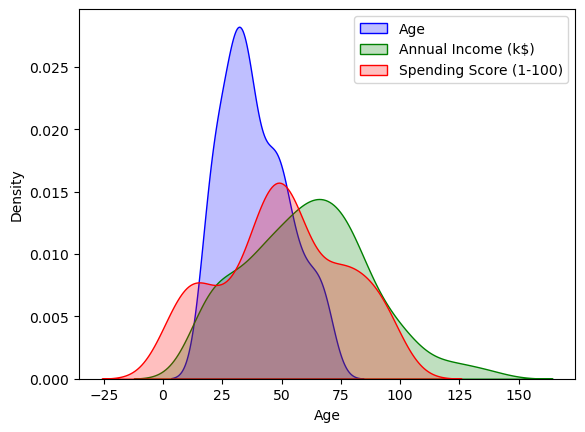

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
colors = ['blue', 'green', 'red']  # Define colors for each plot

for i, column in enumerate(columns):
    # Plot KDE for the current column
    sns.kdeplot(df[column], shade=True, color=colors[i], label=column)
    
# Add legend
plt.legend()

# Show plot
plt.show()

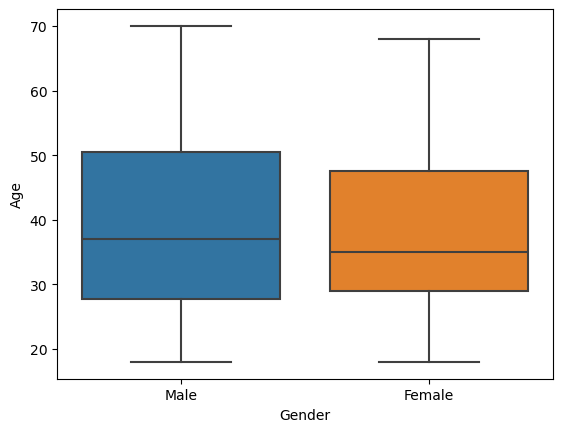

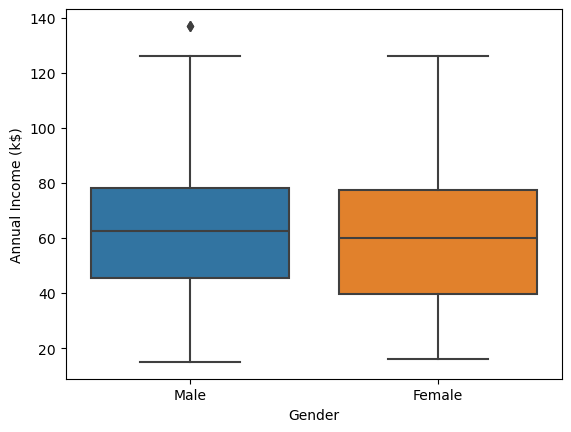

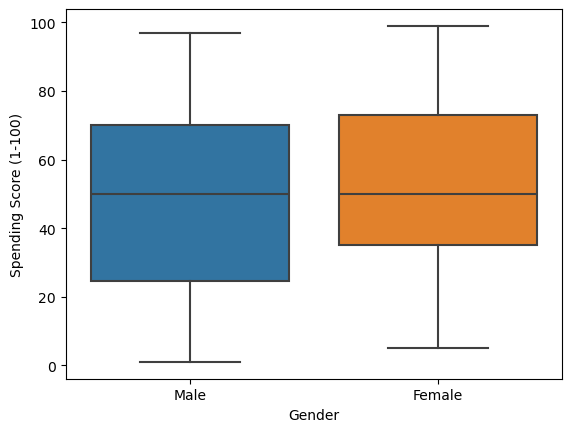

In [30]:
columns =['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [33]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

Bivariate Analysis

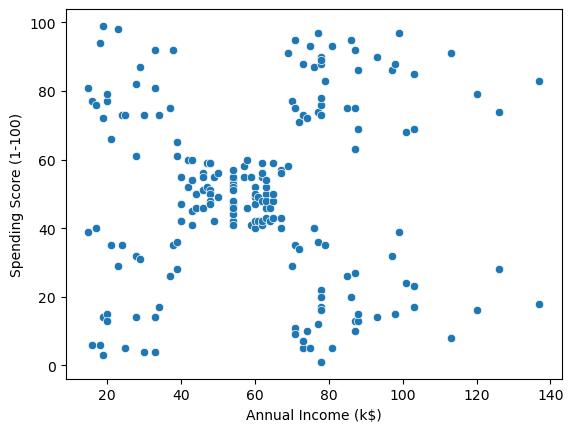

In [34]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)');

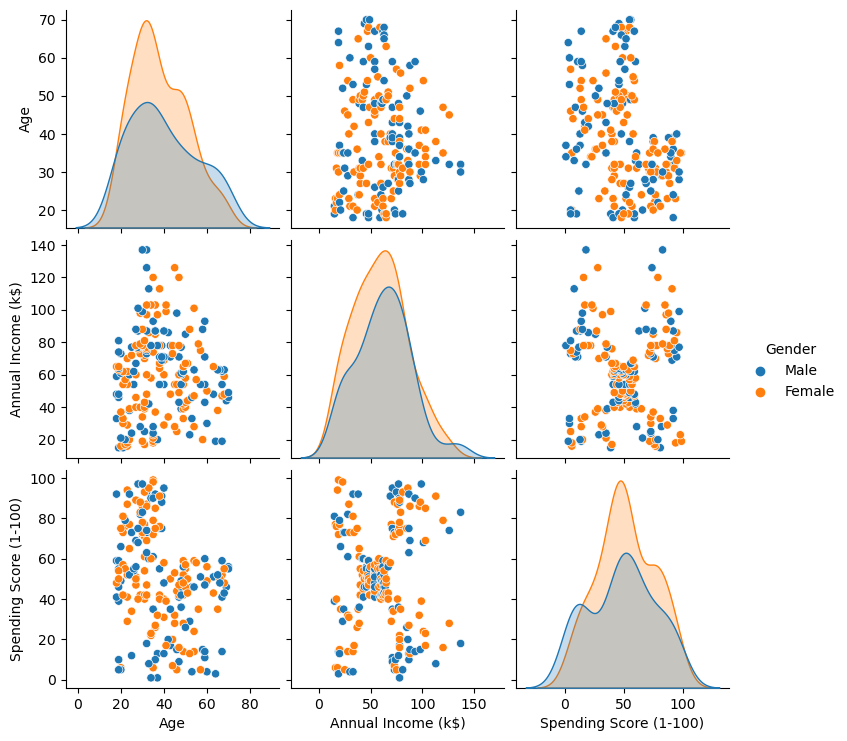

In [37]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender');

In [40]:
df.groupby(df['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [43]:
# Exclude non-numeric columns from correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation
correlation_matrix = numeric_df.corr()
correlation_matrix

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

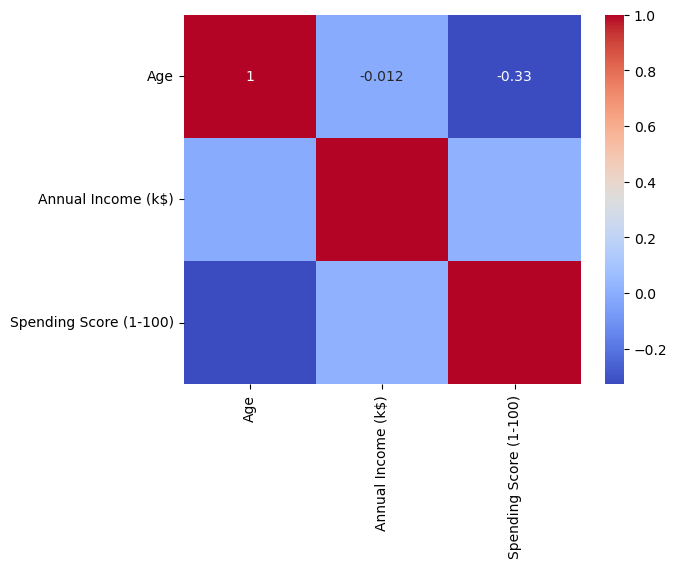

In [46]:
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm')

Clustering - Univariate, Bivariate, Multivariate

In [70]:
from sklearn.cluster import KMeans

# Instantiate the KMeans model
clustering1 = KMeans(n_clusters=3)  # Specify the number of clusters

In [71]:
# Fit the model to the data
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [72]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [73]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [74]:
df['Income Cluster'].value_counts()

Income Cluster
0    92
2    72
1    36
Name: count, dtype: int64

In [75]:
clustering1.inertia_

23528.152173913044

In [76]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [77]:
inertia_scores

[137277.28,
 48660.88888888889,
 23517.330930930937,
 13278.112713472485,
 8481.496190476191,
 5081.48466026727,
 3941.4163614163617,
 2857.441697191697,
 2208.812049062049,
 1746.470779220779]

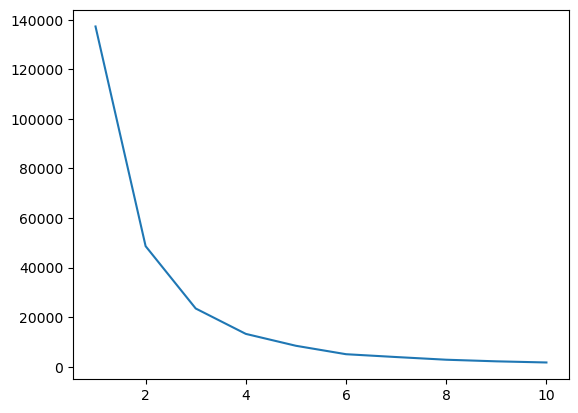

In [79]:
plt.plot(range(1,11),inertia_scores);

In [81]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [82]:
df.groupby(['Income Cluster'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.184783,66.717391,50.054348
1,37.833333,99.888889,50.638889
2,38.930556,33.027778,50.166667


Bivariate Analysis

In [95]:
clustering2 = KMeans(n_clusters=5)

In [96]:
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Fit the clustering model to the data
clustering2.fit(data)

KMeans(n_clusters=5)

In [97]:
clustering2.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [98]:
df['Spending and Income Cluster']=clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,3
1,Male,21,15,81,2,4
2,Female,20,16,6,2,3
3,Female,23,16,77,2,4
4,Female,31,17,40,2,3


In [99]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

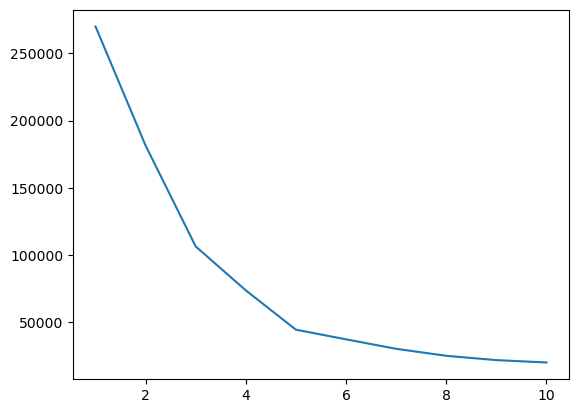

In [100]:
plt.plot(range(1,11),inertia_scores2);

In [112]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']

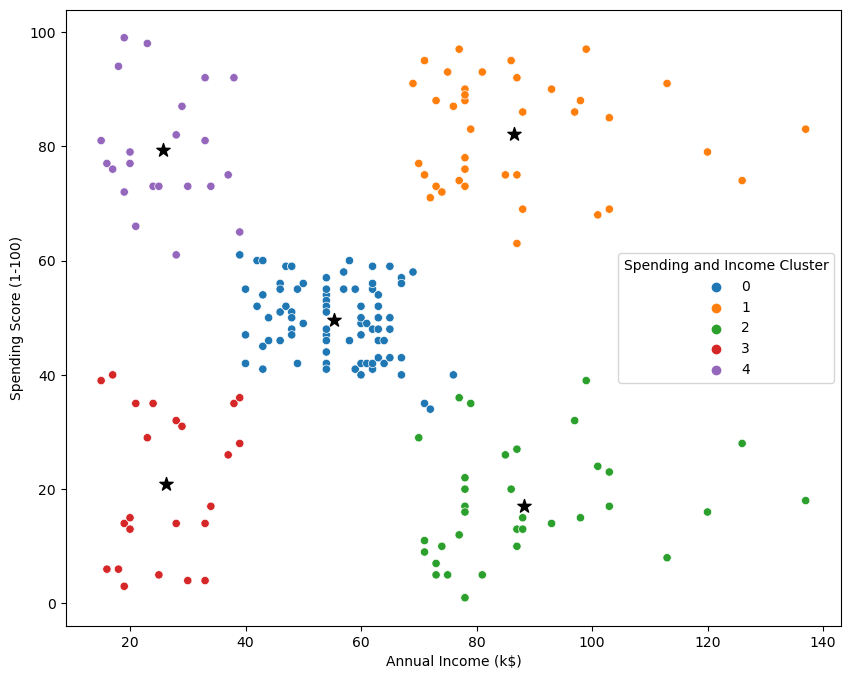

In [135]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df,x='Annual Income (k$)', y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10');
plt.savefig('Clustering_Bivariate.png')

In [117]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.457143,0.542857
3,0.608696,0.391304
4,0.590909,0.409091


In [116]:
df.groupby(['Spending and Income Cluster'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,41.114286,88.200000,17.114286
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


In [119]:
#Multivariate Analysis
from sklearn.preprocessing import StandardScaler


In [120]:
scale = StandardScaler()

In [121]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,3
1,Male,21,15,81,2,4
2,Female,20,16,6,2,3
3,Female,23,16,77,2,4
4,Female,31,17,40,2,3


In [124]:
dff =pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,2,3,True
1,21,15,81,2,4,True
2,20,16,6,2,3,False
3,23,16,77,2,4,False
4,31,17,40,2,3,False


In [125]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [126]:
dff=dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [127]:
dff = scale.fit_transform(dff)

In [130]:
dff=pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [131]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)

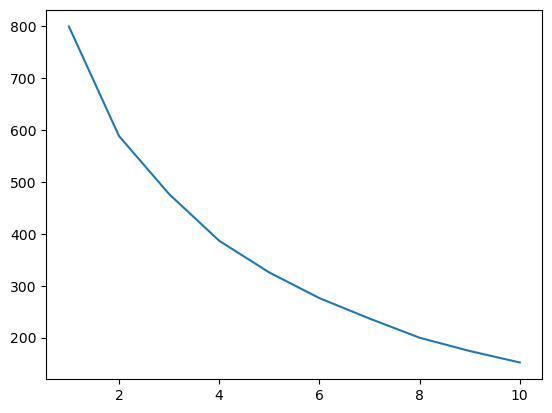

In [132]:
plt.plot(range(1,11),inertia_scores3);

In [133]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,3
1,Male,21,15,81,2,4
2,Female,20,16,6,2,3
3,Female,23,16,77,2,4
4,Female,31,17,40,2,3
...,...,...,...,...,...,...
195,Female,35,120,79,1,1
196,Female,45,126,28,1,2
197,Male,32,126,74,1,1
198,Male,32,137,18,1,2


In [134]:
df.to_csv('Clustering.csv')